## Multiple Linear Regression

Now we know how to build a model with one X (feature variable) and Y (response variable). But what if we have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, we can build models between a response variable and many feature variables through multiple linear regression

**Multiple Linear Regression:**
The name multiple linear regression itself gives you a fair idea about it. It explains the relationship between two or more independent variables and a response variable by fitting a straight line.
Let's see how to do that.

### Step_1 : Importing and Understanding Data

In [5]:
import pandas as pd

In [6]:
# Importing advertising.csv
advertising_multi = pd.read_csv(r'advertising.csv')

In [7]:
# Looking at the first five rows
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
# Looking at the last five rows
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [9]:
# What type of values are stored in the columns?
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# Let's look at some statistical information about our dataframe.
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Step_2: Visualizing Data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

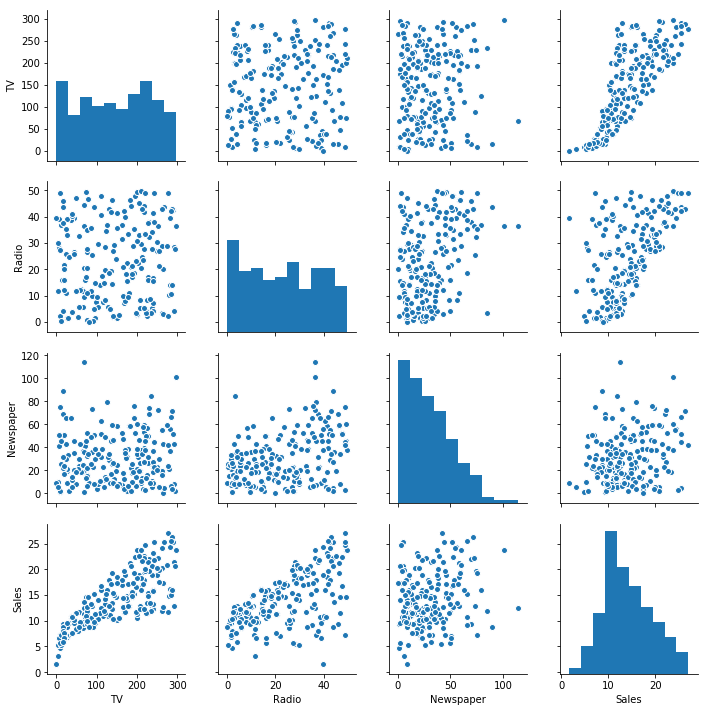

In [13]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(advertising_multi)

We can very clearly make out that Sales wrt TV and Sales wrt Radio has a good relation whereas Sales wrt newspaper is not good and their doesn't exist a relation between them

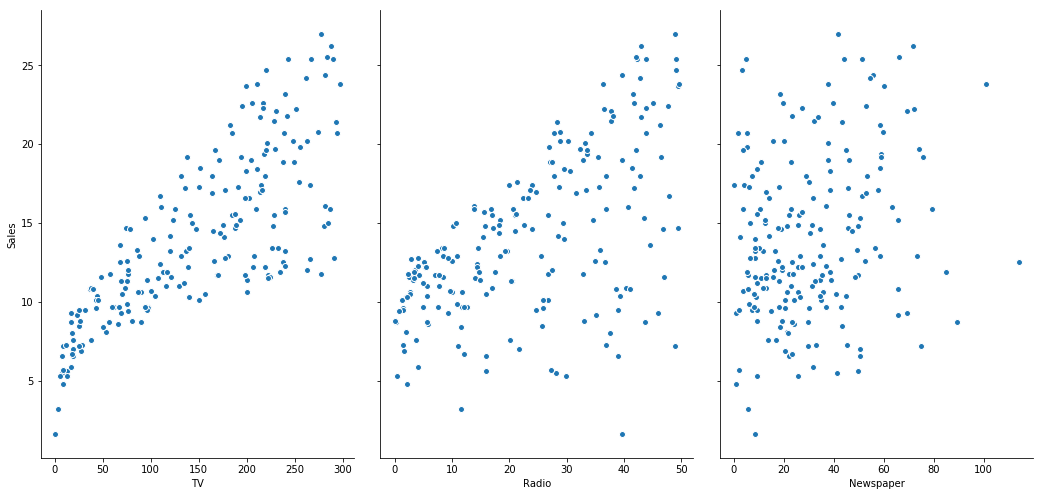

In [15]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising_multi, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

### Step_3: Splitting the Data for Training and Testing

In [16]:
# Putting feature variable to X
X = advertising_multi[['TV','Radio','Newspaper']]

# Putting response variable to y
y = advertising_multi['Sales']

In [29]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

### Step_4 : Performing Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

In [32]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step_5 : Model Evaluation

In [33]:
# print the intercept
print(lm.intercept_)
print(lm.coef_)

2.652789668879496
[0.0454256  0.18975773 0.00460308]


In [34]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


From the above result, we may infer that if TV price increases by 1 unit, it will affect sales by 0.043 units.
If Radio price increases by 1 unit, it will affect sales by 0.189 units.

### Step_6 : Predictions

In [35]:
# Making predictions using the model
y_pred = lm.predict(X_test)

In [36]:
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

### Step_7: Calculating Error Terms

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [38]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.8506819941636965
r_square_value : 0.9058622107532246


### Optional Step : Checking for P-value Using STATSMODELS

In [20]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [21]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 28 Feb 2018   Prob (F-statistic):           9.97e-66
Time:                        18:17:05   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

From the above ,we can see that the p-value of Newspaper is >0.5 which becomes insignificant.   
The  null hypothesis in this case , the coefficient is actually equal to 0.    
If the pvalue is high , the null hypothesis is true. So that variable is insignificant as the p value >0.5.

Also the coeff of newspaper is 0.0046 which is feebly related to the sales comparing the other 2 features.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lets investigate if there is any correlation between independent features , which makes them insignificant.

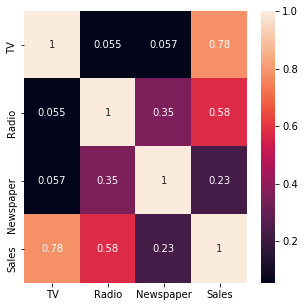

In [50]:
plt.figure(figsize = (5,5))
sns.heatmap(advertising_multi.corr(),annot = True)

### Step_8 : Implementing the results and running the model again

From the data above, you can conclude that there is correlation between Newspaper and Radio.   
Newspaper is insignificant in the presence of Radio. Hence removing Newspaper

In [52]:
# Putting feature variable to X
X = advertising_multi[['TV','Radio','Newspaper']]

# Putting response variable to y
y = advertising_multi['Sales']

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=101)

# Removing Newspaper from our dataset
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [53]:
# Model building
lm.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# Making predictions
y_pred_new = lm.predict(X_test_new)
y_pred_new

array([15.7429228 , 19.60103201, 11.45247836, 17.01159489,  9.16431941,
        7.01175976, 20.2833574 , 17.29306437,  9.77187777, 19.22218409,
       12.39732732, 13.88403864, 13.72189557, 21.29317087, 18.4368759 ,
        9.97910806, 15.55050134,  7.68508218,  7.55455242, 20.40074603,
        7.78913032, 18.24178247, 24.68512258, 22.82596939,  7.97255203,
       12.65572025, 21.45805128,  8.05852617, 12.42060752, 12.51738415,
       10.78815999, 19.2471293 , 10.06601786,  6.71595197, 17.31574116,
        7.77085643,  9.2544301 ,  8.27402956, 10.58479615, 10.63148784,
       13.03556546,  9.77361191, 10.21889001,  8.05325621, 11.56439768,
       10.08062358,  8.99130311, 16.26043907, 13.24980307, 20.81814437,
       12.50037656, 13.96634513, 17.56059318, 11.13859548, 12.56200891,
        5.50337378, 23.28238706, 12.61429744, 18.76363303, 15.18792683])

Text(0,0.5,'Sales')

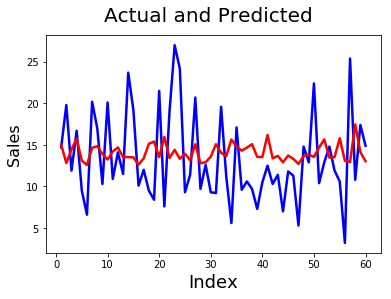

In [56]:
#Actual vs Predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label

Text(0,0.5,'ytest-ypred')

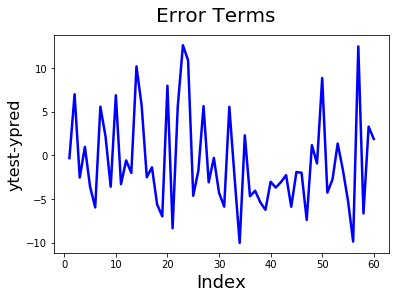

In [57]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [59]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 2.2995771958957367
r_square_value : 0.9185476109820698


In [60]:
X_train_final = X_train_new
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_final = sm.add_constant(X_train_final)
# create a fitted model in one line
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

NameError: name 'sm' is not defined

### Model Refinement Using RFE

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the less important features are pruned from the the current set of features. This procedure is recursively repeated on the pruned dataset until the desired number of features to select is reached.

In [61]:
from sklearn.feature_selection import RFE

In [62]:
rfe = RFE(lm, 2)

In [63]:
rfe = rfe.fit(X_train, y_train)

In [64]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


### Simple Linear Regression: Newspaper(X) and Sales(y)

In [43]:
import pandas as pd
import numpy as np
# Importing dataset
advertising_multi = pd.read_csv('advertising.csv')

x_news = advertising_multi['Newspaper']

y_news = advertising_multi['Sales']

# Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_news, y_news, 
                                                    train_size=0.7 , 
                                                    random_state=110)

# Required only in the case of simple linear regression
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

# Linear regression from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fitting the model
lm.fit(X_train,y_train)

# Making predictions
y_pred = lm.predict(X_test)

# Importing mean square error and r square from sklearn library.
from sklearn.metrics import mean_squared_error, r2_score

# Computing mean square error and R square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

#printing intercepts and slope
print ('intercepts:', lm.intercept_)
print ('slope:',lm.coef_)

Mean_Squared_Error : 23.84732008485191
r_square_value : 0.08182413570736657
intercepts: 12.54091444237547
slope: [0.04318635]


Though newspaper has the same slope as TV but it only explains 8.18% of the variance which it is not a very good feature.